In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config

In [2]:
DATA_FILE_NAME = "result.csv"

<Axes: >

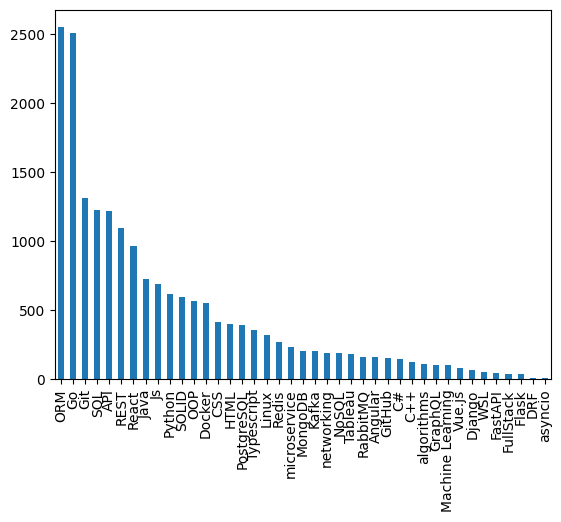

In [5]:
df = pd.read_csv(DATA_FILE_NAME)

# convert skills column from str, to list
df["skills"] = df["skills"].apply(eval)
df["skills"] = df["skills"].apply(lambda x: [item.strip() for item in x])


# Get all unique skills name
skills_exploded = df["skills"].explode()

# Create new columns to work with
skills_crosstab = pd.crosstab(skills_exploded.index, skills_exploded)

#merge to main Dataframe
df = df.join(skills_crosstab, rsuffix="_")

df = df.dropna(subset=["API"])

skill_counts = df.iloc[:, -len(skills_crosstab.columns):].sum()
skill_counts.sort_values(ascending=False).plot(kind="bar")

Plot by work places (cities, remote, abroad)

<Axes: xlabel='places'>

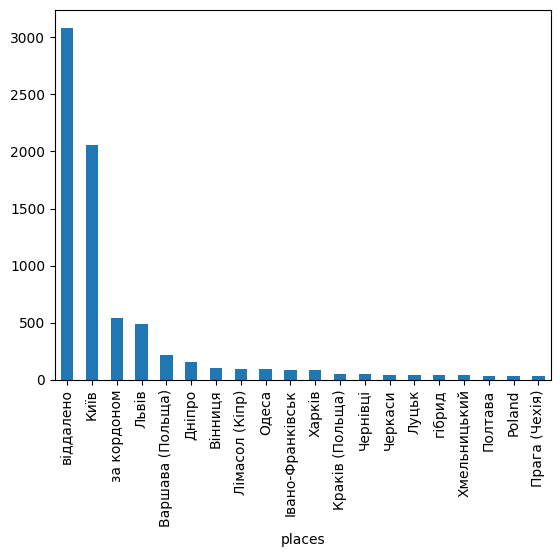

In [6]:
df = pd.read_csv(DATA_FILE_NAME)

df = df.dropna(subset=["places"])
df["places"] = df["places"].apply(lambda x: eval(x) if isinstance(x, str) else x)
df["places"] = df["places"].apply(lambda x: [item.strip() for item in x])

places_exploded = df["places"].explode()

places_crosstab = pd.crosstab(places_exploded.index, places_exploded)

df.join(places_crosstab, rsuffix="_")

places_crosstab.sum().sort_values(ascending=False)[:20].plot(kind="bar")

<Axes: xlabel='experience', ylabel='Average Salary'>

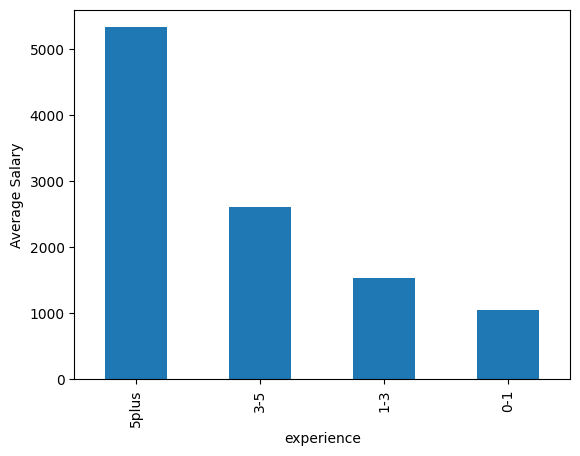

In [17]:
df = pd.read_csv(DATA_FILE_NAME)

df.dropna(subset=["salary_min", "salary_max"], inplace=True)
df["avg_salary"] = (df["salary_min"] + df["salary_max"]) / 2
df.groupby("experience")["avg_salary"].mean().sort_values(ascending=False).plot(kind="bar", ylabel="Average Salary")